## Лабораторная работа 4.7.2

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as sp
import tikzplotlib as tikz

In [35]:
def csvtotex(input, output, columns=None, rows=[-1], type=None, transp=False):
    df = pd.read_csv(input, sep=",", usecols=columns, quotechar='"', dtype=type)
    df = df[df.index.isin(rows)]
    if transp:
        df = df.transpose()
        pd.DataFrame.to_csv(df, output, sep="&", index=True)
        with open(output, "r") as data:
            content = data.readlines()
        with open(output, "w") as data:
            data.write("\\begin{tabular}{")
            for c in rows: data.write("|l")
            data.write("|l|}")
            data.write("\hline")
            content.pop(0)
            for str in content:
                data.write(str)
                data.write("\\\\")
                data.write("\hline")
            data.write("\end{tabular}")
    else:
        pd.DataFrame.to_csv(df, output, sep="&", index=False)
        with open(output, "r") as data:
            content = data.readlines()
        with open(output, "w") as data:
            data.write("\\begin{tabular}{")
            for c in columns: data.write("|l")
            data.write("|}")
            data.write("\hline")
            for str in content:
                data.write(str)
                data.write("\\\\")
                data.write("\hline")
            data.write("\end{tabular}")
    return df

In [36]:
def print_err(a, a_err, vis=True):
    a = np.array([a]).flatten()
    a_err = np.array([a_err]).flatten()
    val = np.zeros_like(a)
    sig = np.zeros_like(a_err)
    for i in range(a.size):
        val[i] = np.round(a[i], decimals = round(1 * (np.trunc(np.log10(a_err[i]) < 0)) - np.trunc(np.log10(a_err[i]))))
        sig[i] = np.round(a_err[i], decimals = round(1 * (np.trunc(np.log10(a_err[i]) < 0)) - np.trunc(np.log10(a_err[i]))))
        if vis: print(val[i], '\pm', sig[i])
    return val, sig

In [37]:
def T(n, x):
    return np.cos(n * np.arccos(x))

In [38]:
data = pd.read_csv('../data/data.csv')

>### Определение разности $(n_o-n_e)$

In [39]:
L = data[data.columns[0]].values[0]
L_err = data[data.columns[1]].values[0]
print_err(L, L_err)

75.0 \pm 0.5


(array([75.]), array([0.5]))

In [40]:
df = csvtotex('../data/data.csv', '../data/table1.tex', columns=range(3, 8), rows=range(7))
display(df)

,$m$,"$r_{I}$, мм","$r_{II}$, мм","$r_{III}$, мм","$r_{IV}$, мм"
0,1,27.0,28.0,25.0,25.0
1,2,39.0,39.0,40.0,39.0
2,3,47.0,49.0,46.0,47.0
3,4,NaN,56.0,54.0,54.0
4,5,NaN,62.0,60.0,60.0
5,6,NaN,70.0,68.0,NaN
6,7,NaN,75.0,75.0,NaN


In [41]:
m = df[df.columns[0]]
r = df.drop(df.columns[0], axis=1)

In [42]:
r_mean = r.mean(axis=1).values
r_std = (r.std(axis=1).values ** 2 * r.shape[1] / (r.shape[1] - 1)) ** 0.5
r_sig = data[data.columns[8]].values[0]
r_err = (r_std ** 2 + r_sig ** 2) ** 0.5

In [43]:
df['$r_{\\text{ср}}$, мм'], df['$\sigma_r$, мм'] = print_err(r_mean, r_err, vis=False)

In [44]:
def fit(x, p0):
    return x * p0

In [45]:
k, err = sp.curve_fit(fit, m, r_mean ** 2)

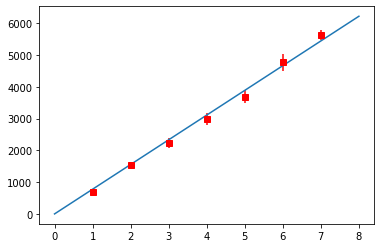

In [46]:
x = np.linspace(0, 8, 2)

plt.errorbar(x=m, y=r_mean ** 2, yerr=2 * r_mean * r_err, fmt='rs')
plt.plot(x, k[0] * x)

#tikz.save('plot1.tex')

In [47]:
print_err(k, err)

800.0 \pm 100.0


(array([800.]), array([100.]))

In [48]:
n_o = data[data.columns[9]].values[0]
l = data[data.columns[10]].values[0]
lam = data[data.columns[11]].values[0] * (10 ** (-6))

In [49]:
n_e = n_o - ((lam / l) * (n_o * L * 10) ** 2 / k[0])
n_e_err = (n_o - n_e) * ((2 * L_err /  L) ** 2 + (err[0] ** 0.5 / k[0]) ** 2) ** 0.5
print_err(n_e, n_e_err)

2.198 \pm 0.002


(array([2.198]), array([0.002]))

In [50]:
df.to_csv('../data/calculated_r.csv', index=False)
df = csvtotex('../data/calculated_r.csv', '../data/table1.tex', columns=range(7), rows=range(7))
display(df)

,$m$,"$r_{I}$, мм","$r_{II}$, мм","$r_{III}$, мм","$r_{IV}$, мм","$r_{\text{ср}}$, мм","$\sigma_r$, мм"
0,1,27.0,28.0,25.0,25.0,26.0,2.0
1,2,39.0,39.0,40.0,39.0,39.0,1.0
2,3,47.0,49.0,46.0,47.0,47.0,2.0
3,4,NaN,56.0,54.0,54.0,55.0,2.0
4,5,NaN,62.0,60.0,60.0,61.0,2.0
5,6,NaN,70.0,68.0,NaN,69.0,2.0
6,7,NaN,75.0,75.0,NaN,75.0,1.0
